In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
# Load dataset
youngTechData = pd.read_csv("./Data/KC_housing_data.csv")

# Quick check
youngTechData.head()
print(youngTechData.columns)

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')


In [4]:
#remove dublicates
youngTechData = youngTechData.drop_duplicates()
#remove rows with missing values
youngTechData = youngTechData.dropna()
#remove rows with 0 price
youngTechData = youngTechData[youngTechData['price'] > 0]

In [5]:
youngTechData.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


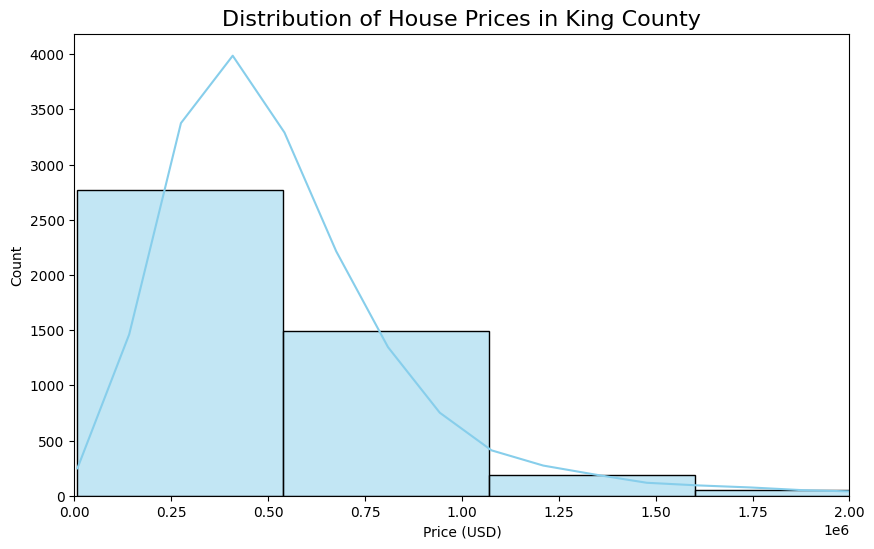

In [6]:
# ==========================
# 2. Price Distribution
# ==========================
plt.figure(figsize=(10,6))
sns.histplot(youngTechData['price'], bins=50, kde=True, color="skyblue")
plt.title("Distribution of House Prices in King County", fontsize=16)
plt.xlabel("Price (USD)")
plt.ylabel("Count")
plt.xlim(0, 2_000_000)  # zoom in (ignore extreme luxury)
plt.show()

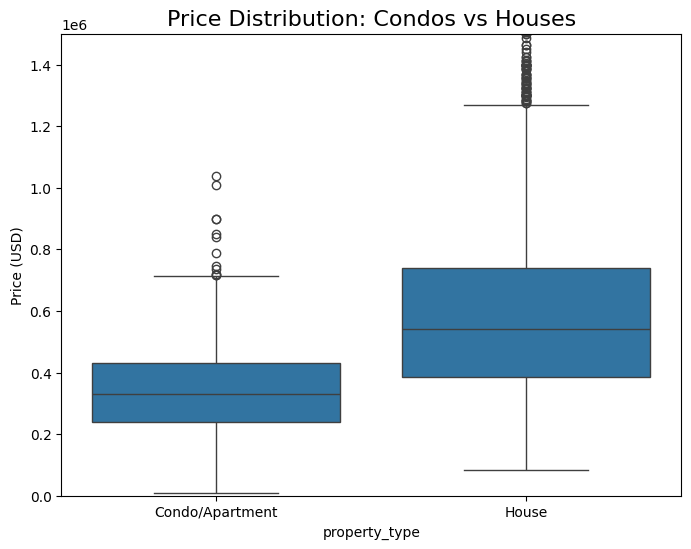

In [7]:
# ==========================
# 3. Condos vs. Houses
# ==========================
# Assume <1500 sqft living area = condo/apartment
youngTechData['property_type'] = np.where(youngTechData['sqft_living'] < 1500,
                                          'Condo/Apartment', 'House')

plt.figure(figsize=(8,6))
sns.boxplot(x="property_type", y="price", data=youngTechData)
plt.title("Price Distribution: Condos vs Houses", fontsize=16)
plt.ylabel("Price (USD)")
plt.ylim(0, 1_500_000)
plt.show()

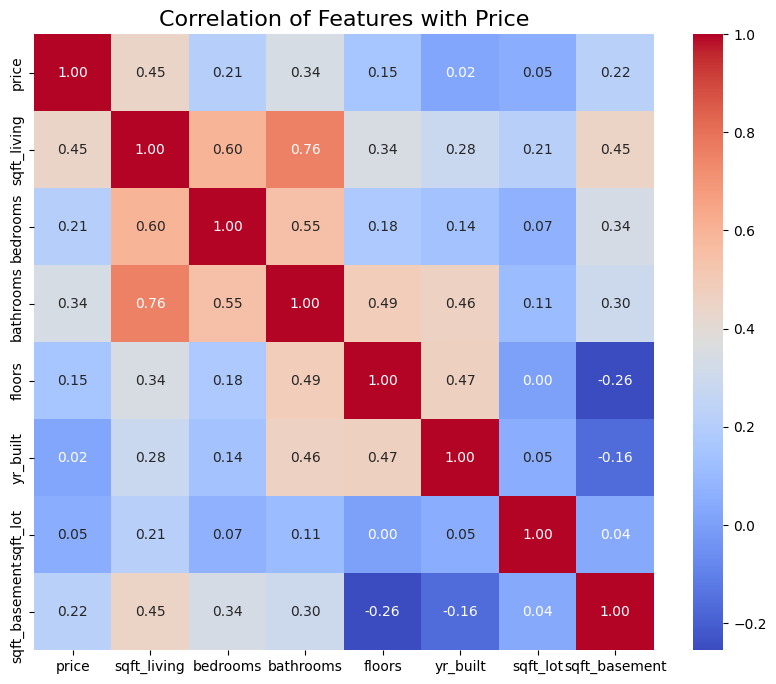

In [8]:
# ==========================
# 4. Heatmap: Feature Correlations
# ==========================
plt.figure(figsize=(10,8))
corr = youngTechData[['price','sqft_living','bedrooms','bathrooms','floors',
                      'yr_built','sqft_lot','sqft_basement']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation of Features with Price", fontsize=16)
plt.show()

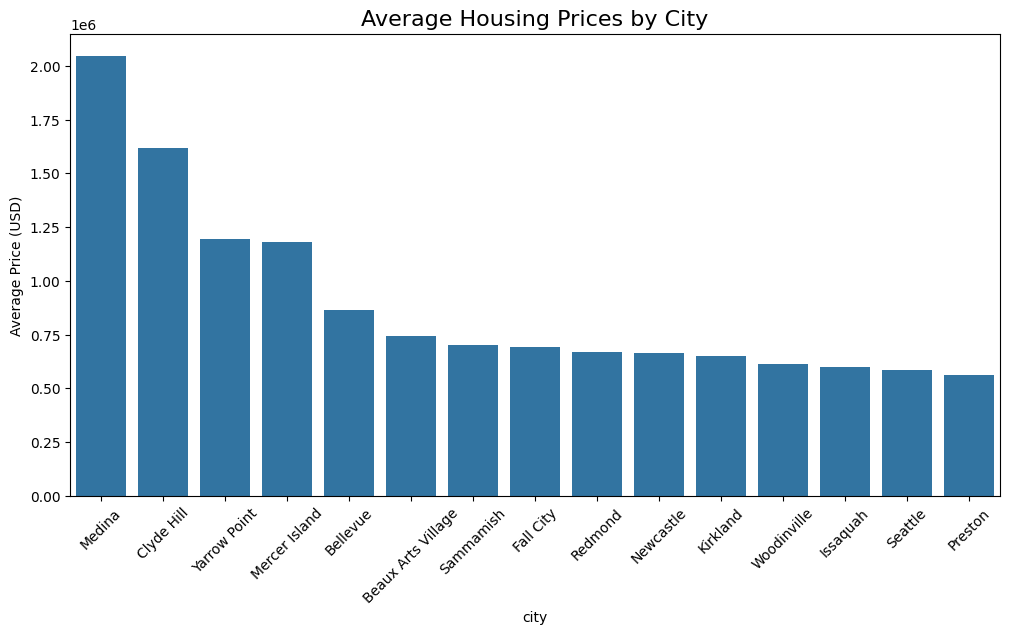

In [9]:
# ==========================
# 5. City-Level Price Insights
# ==========================
# Average prices
city_prices = youngTechData.groupby('city')['price'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x="city", y="price", data=city_prices.sort_values("price", ascending=False).head(15))
plt.title("Average Housing Prices by City", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Average Price (USD)")
plt.show()


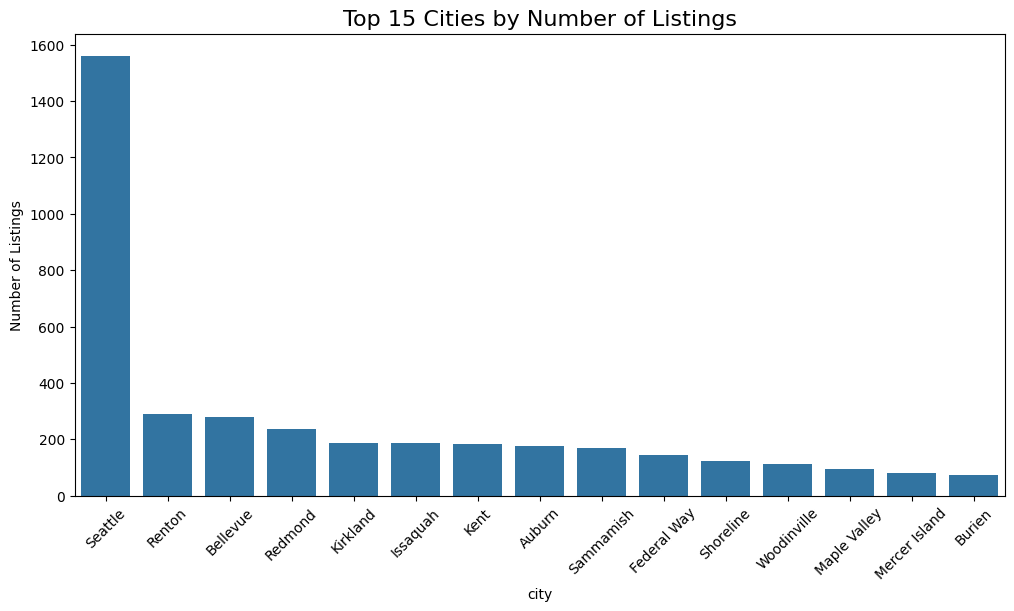

In [10]:

# Number of listings
city_counts = youngTechData['city'].value_counts().reset_index()
city_counts.columns = ['city', 'count']

plt.figure(figsize=(12,6))
sns.barplot(x="city", y="count", data=city_counts.head(15))
plt.title("Top 15 Cities by Number of Listings", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Number of Listings")
plt.show()


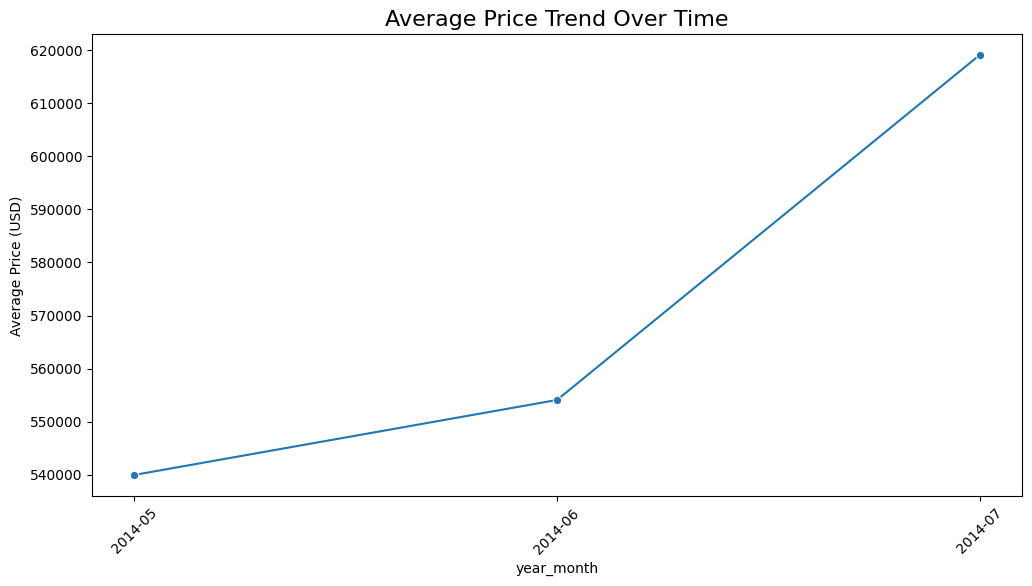

In [11]:
youngTechData['date'] = pd.to_datetime(youngTechData['date'])

# Create a year-month column
youngTechData['year_month'] = youngTechData['date'].dt.to_period('M')

# Group by year-month
price_trend = youngTechData.groupby('year_month')['price'].mean().reset_index()

# Convert back to string for plotting
price_trend['year_month'] = price_trend['year_month'].astype(str)

plt.figure(figsize=(12,6))
sns.lineplot(x="year_month", y="price", data=price_trend, marker="o")
plt.xticks(rotation=45)
plt.title("Average Price Trend Over Time", fontsize=16)
plt.ylabel("Average Price (USD)")
plt.show()
